In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
base_dir = '2025-12-09_train' # one subject

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/one_subject.csv',
    output_func=['softplus', 'pow10'],
    output_scale=[1.0, 1000.],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [4]:
base_dir = '2025-12-16_train' # ten subjects

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/ten_subjects.csv',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [5]:
base_dir = '2025-01-05_train' # full dataset

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/subjects.csv',
    variant='2025-01-05',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [4]:
base_dir = '2026-01-27_train' # new config file, updated/fixed uniform + seeded material sampling, DICE score, etc. try bounds modes.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.bounds_mode={bounds_mode} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    bounds_mode=['hard', 'soft', 'none'],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 12

12

In [5]:
base_dir = '2026-01-28_train' # try different input shifts, revert output shift/scale

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_shift={output_shift} \\
    --set training.model.output_scale={output_scale} \\
    --set training.model.input_shift={input_shift} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='basic',
    output_shift=[3.0],
    output_scale=[0.1],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
) + ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='stats',
    output_shift=[3.4863],
    output_scale=[0.3271],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [6]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.supervised,params.rho_known,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,9cc9f52f0b294478,RUNNING,1,37202111,v034,6:33:08,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
1,ce6777cfc9981749,RUNNING,1,37202112,v034,6:25:06,Loading /ocean/projects/asc170022p/mtragoza/lu...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
2,35747de7e9868aed,RUNNING,1,37202113,v034,6:17:05,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
3,3615bfa2e48b3ac1,RUNNING,1,37202114,v024,6:13:05,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
4,d820be93c8704340,RUNNING,1,37202115,v034,6:09:04,Loading /ocean/projects/asc170022p/mtragoza/lu...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
5,2391ae8f4a8922a7,RUNNING,1,37202116,v022,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
6,722a0d69702c1700,RUNNING,1,37202117,v023,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
7,bb1b04a69c92f985,RUNNING,1,37202118,v023,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
8,0f2fbc6ae49a0171,RUNNING,1,37202119,v023,6:05:03,[Epoch 8 | Train batch 69/624] loss = 4.6878e-...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,None,None,False,None,None
9,a012bc64fc8402ce,RUNNING,1,37202120,v022,6:01:03,[Epoch 8 | Train batch 211/624] loss = 4.9993e...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,None,None,False,None,None


In [7]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.supervised,params.rho_known,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
RUNNING,16,16,16,16,16,16,16,16,16,16,...,16,16,0,16,16,0,0,16,0,0


In [8]:
jobs = ps.collect(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.supervised,params.rho_known,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,9cc9f52f0b294478,RUNNING,1,37202111,v034,8:12:16,[Epoch 10 | Train batch 5/624] loss = 3.4116e-...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
1,ce6777cfc9981749,RUNNING,1,37202112,v034,8:04:14,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
2,35747de7e9868aed,RUNNING,1,37202113,v034,7:56:13,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
3,3615bfa2e48b3ac1,RUNNING,1,37202114,v024,7:52:13,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
4,d820be93c8704340,RUNNING,1,37202115,v034,7:48:12,Loading /ocean/projects/asc170022p/mtragoza/lu...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
5,2391ae8f4a8922a7,RUNNING,1,37202116,v022,7:44:11,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
6,722a0d69702c1700,RUNNING,1,37202117,v023,7:44:11,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
7,bb1b04a69c92f985,RUNNING,1,37202118,v023,7:44:11,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
8,0f2fbc6ae49a0171,RUNNING,1,37202119,v023,7:44:11,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>
9,a012bc64fc8402ce,RUNNING,1,37202120,v022,7:40:11,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T11:29:00,status,None,None,False,<NA>,<NA>


In [277]:
j = 0
jobs[jobs.job_state == 'FAILED'].iloc[j]

IndexError: single positional indexer is out-of-bounds

In [278]:
j = 0
failed_jobs = jobs[jobs.job_state == 'FAILED']
print(failed_jobs.iloc[j])
print(failed_jobs.iloc[j].stderr)

IndexError: single positional indexer is out-of-bounds

In [279]:
#jobs.loc[jobs.job_state == 'FAILED', 'job_id'] = pd.NA
#jobs = ps.submit(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.supervised,params.rho_known,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,9cc9f52f0b294478,RUNNING,1,37202111,v034,6:33:08,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
1,ce6777cfc9981749,RUNNING,1,37202112,v034,6:25:06,Loading /ocean/projects/asc170022p/mtragoza/lu...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
2,35747de7e9868aed,RUNNING,1,37202113,v034,6:17:05,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
3,3615bfa2e48b3ac1,RUNNING,1,37202114,v024,6:13:05,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
4,d820be93c8704340,RUNNING,1,37202115,v034,6:09:04,Loading /ocean/projects/asc170022p/mtragoza/lu...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
5,2391ae8f4a8922a7,RUNNING,1,37202116,v022,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
6,722a0d69702c1700,RUNNING,1,37202117,v023,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
7,bb1b04a69c92f985,RUNNING,1,37202118,v023,6:05:03,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
8,0f2fbc6ae49a0171,RUNNING,1,37202119,v023,6:05:03,[Epoch 8 | Train batch 69/624] loss = 4.6878e-...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>
9,a012bc64fc8402ce,RUNNING,1,37202120,v022,6:01:03,[Epoch 8 | Train batch 211/624] loss = 4.9993e...,"plt.colorbar(self.im_k, cax=self.cbar_ax)\n/...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,NaN,2026-01-28T09:49:52,status,NaN,NaN,False,<NA>,<NA>


In [9]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load training jobs
jobs_t = ps.load('2026-01-27_train')
ex_df_t = ps.outputs(jobs_t,  output_name='outputs/example_metrics.csv')
mat_df_t = ps.outputs(jobs_t,  output_name='outputs/material_metrics.csv')

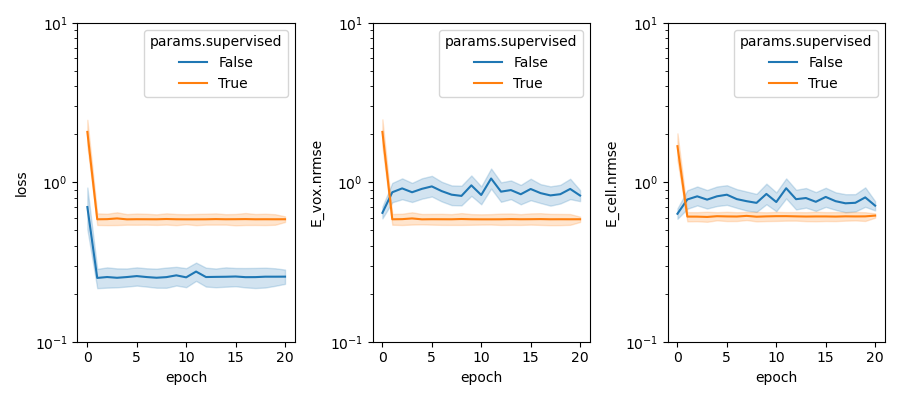

In [11]:
fig, axes = plt.subplots(1,3, figsize=(9,4))

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='loss',
    hue='params.supervised',
    ax=axes[0]
)
axes[0].set_yscale('log')
axes[0].set_ylim(0.1, 10)

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='E_vox.nrmse',
    hue='params.supervised',
    ax=axes[1]
)
axes[1].set_yscale('log')
axes[1].set_ylim(0.1, 10)

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='E_cell.nrmse',
    hue='params.supervised',
    ax=axes[2]
)
axes[2].set_yscale('log')
axes[2].set_ylim(0.1, 10)

fig.tight_layout()

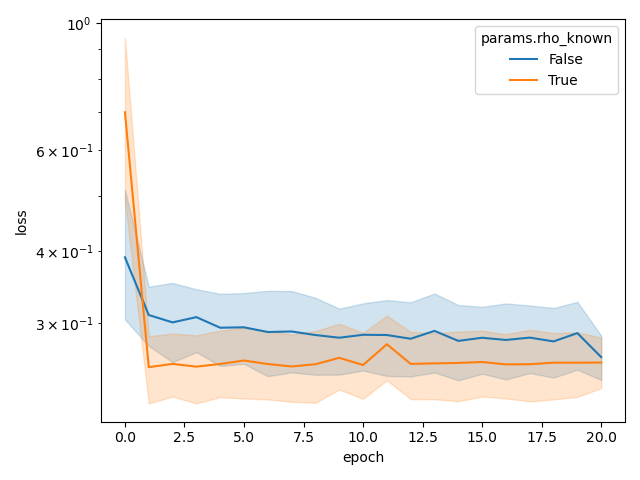

In [12]:
fig, ax = plt.subplots()

sns.lineplot(
    ex_df_t[
        ~ex_df_t['params.supervised'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='loss',
    hue='params.rho_known',
    ax=ax
)
ax.set_yscale('log')
fig.tight_layout()

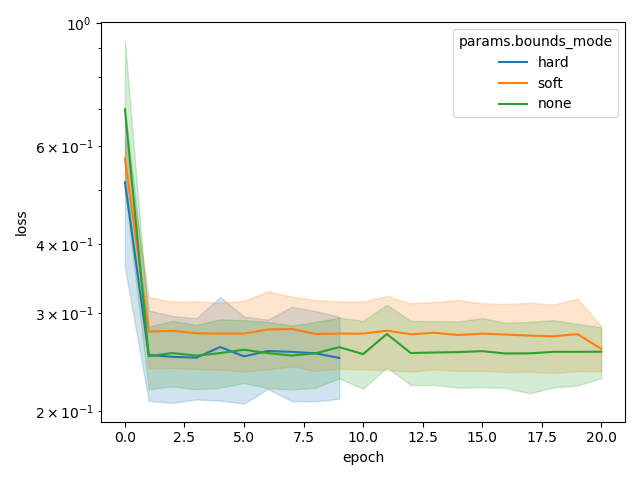

In [14]:
fig, ax = plt.subplots()

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        ~ex_df_t['params.supervised']
    ],
    x='epoch',
    y='loss',
    hue='params.bounds_mode',
    ax=ax
)
ax.set_yscale('log')
fig.tight_layout()

In [15]:
# load optimization baseline
jobs_o = ps.load('2026-01-26_optimize')
ex_df_o = ps.outputs(jobs_o,  output_name='outputs/example_metrics.csv')
mat_df_o = ps.outputs(jobs_o,  output_name='outputs/material_metrics.csv')

In [18]:
def parse_subjects(path, prefix):
    import ast
    with open(path) as f:
        for line in f:
            if line.startswith(prefix):
                subjs = line[len(prefix):].strip()
                return ast.literal_eval(subjs)

test_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Test subjects:')
test_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Test subjects:')
print(len(test_set1), len(test_set2), test_set1 == test_set2)

val_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Val subjects:')
val_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Val subjects:')
print(len(val_set1), len(val_set2), val_set1 == val_set2)

train_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Train subjects:')
train_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Train subjects:')
print(len(train_set1), len(train_set2), train_set1 == train_set2)

195 195 True
91 91 False
624 624 False


In [19]:
import project

config = project.core.fileio.load_config('2026-01-15_config.yaml')
config['dataset']['examples']['subjects'] = \
    '/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv'

examples = project.api.get_examples(config['dataset'])

bad_set = set()
for ex in examples:
    if all(c.startswith('_') for c in ex.metadata['category']):
        bad_set.add(ex.subject)

len(bad_set)

Loading 2026-01-15_config.yaml
Gathering examples


35

In [27]:
len(train_set1) + len(val_set1) + len(test_set1) + len(bad_set)

945

In [30]:
len(train_set1) + len(val_set1)

715

In [24]:
ex_df_t.groupby(['params.supervised', 'params.rho_known', 'params.bounds_mode', 'epoch', 'phase']).count()

batch  \
params.supervised params.rho_known params.bounds_mode epoch phase          
False             False            hard               0     val       91   
                                                      1     val       91   
                                                      2     val       91   
                                                      3     val       91   
                                                      4     val       91   
...                                                                  ...   
True              True             soft               17    val       91   
                                                      18    val       91   
                                                      19    val       91   
                                                      20    test     195   
                                                            val       91   

                                                                   step  loss  \
params.supervised params.rho_known params.bounds_mode epoch phase               
False             False            hard               0     val      91    91   
                                                      1     val      91    91   
                                                      2     val      91    91   
                                                      3     val      91    91   
                                                      4     val      91    91   
...                                                                 ...   ...   
True              True             soft               17    val      91    91   
                                                      18    val      91    91   
                                                      19    val      91    91   
                                                      20    test    195   195   
                                                            val      91    91   

                                                                   subject  \
params.supervised params.rho_known params.bounds_mode epoch phase            
False             False            hard               0     val         91   
                                                      1     val         91   
                                                      2     val         91   
                                                      3     val         91   
                                                      4     val         91   
...                                                                    ...   
True              True             soft               17    val         91   
                                                      18    val         91   
                                                      19    val         91   
                                                      20    test       195   
                                                            val         91   

                                                                   num_voxels  \
params.supervised params.rho_known params.bounds_mode epoch phase               
False             False            hard               0     val            91   
                                                      1     val            91   
                                                      2     val            91   
                                                      3     val            91   
                                                      4     val            91   
...                                                                       ...   
True              True             soft               17    val            91   
                                                      18    val            91   
                                                      19    val            91   
                                                      20    test          195   
                                     

In [29]:
ex_df_o['val_subject'] = ~ex_df_o['params.subject'].isin(test_set1 | bad_set)

ex_df_o.groupby(['params.rho_known', 'val_subject']).count()

epoch  phase  batch  step  loss  subject  \
params.rho_known val_subject                                             
False            False          230    230    230   230   230      230   
                 True           715    715    715   715   715      715   
True             False          230    230    230   230   230      230   
                 True           715    715    715   715   715      715   

                              num_voxels  E_vox.mean  E_vox.rms  E_vox.rmse  \
params.rho_known val_subject                                                  
False            False               230         230        230         230   
                 True                715         715        715         715   
True             False               230         230        230         230   
                 True                715         715        715         715   

                              ...  u_cell.scorr  res_cell.mean  res_cell.rms  \
params.rho_known val_subject  ...                                              
False            False        ...           230            230           230   
                 True         ...           715            715           715   
True             False        ...           230            230           230   
                 True         ...           715            715           715   

                              source_path  job_name  job_id  params_hash  \
params.rho_known val_subject                                               
False            False                230       230     230          230   
                 True                 715       715     715          715   
True             False                230       230     230          230   
                 True                 715       715     715          715   

                              params.subject  params.variant  params.config  
params.rho_known val_subject                                                 
False            False                   230             230            230  
                 True                    715             715            715  
True             False                   230             230            230  
                 True                    715             715            715  

[4 rows x 46 columns]

In [46]:
%autoreload
ex_df = pd.concat([
    ex_df_t[(ex_df_t.epoch == 20) & (ex_df_t.phase == 'val') & (ex_df_t['params.bounds_mode'] == 'none')],
    ex_df_o[ex_df_o.subject.isin(val_set1)]
])
ex_df['params.rho_known']  = ex_df['params.rho_known'].astype(bool)
ex_df['params.supervised'] = ex_df['params.supervised'].astype(bool)

ex_df['method'] = 'unknown'
ex_df.loc[(ex_df.phase == 'optimize'), 'method'] = 'FEM-opt'
ex_df.loc[(ex_df.phase != 'optimize') & ex_df['params.supervised'], 'method'] = 'sup-DL'
ex_df.loc[(ex_df.phase != 'optimize') & ~ex_df['params.supervised'], 'method'] = 'FEM-DL'

ex_df.groupby(['method', 'params.rho_known']).describe()

epoch                                          batch  \
                         count  mean  std   min   25%   50%   75%   max count   
method  params.rho_known                                                        
FEM-DL  False             91.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  91.0   
        True              91.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  91.0   
FEM-opt False             91.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  91.0   
        True              91.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  91.0   
sup-DL  False             91.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  91.0   
        True              91.0  20.0  0.0  20.0  20.0  20.0  20.0  20.0  91.0   

                                ... res_cell.mean           res_cell.rms  \
                          mean  ...           75%       max        count   
method  params.rho_known        ...                                        
FEM-DL  False             45.0  ...      1.157744  3.580209         91.0   
        True              45.0  ...      1.458599  6.518658         91.0   
FEM-opt False              0.0  ...      0.964960  4.150671         91.0   
        True               0.0  ...      1.011577  5.486236         91.0   
sup-DL  False             45.0  ...      1.500410  7.795487         91.0   
        True              45.0  ...      1.221661  5.684173         91.0   

                                                                            \
                              mean       std       min       25%       50%   
method  params.rho_known                                                     
FEM-DL  False             1.081341  1.500203  0.000175  0.026903  0.226885   
        True              1.539364  1.857479  0.000649  0.040801  0.614404   
FEM-opt False             1.128313  1.539222  0.000536  0.045947  0.231753   
        True              1.253768  1.806480  0.000480  0.046485  0.267516   
sup-DL  False             1.455592  1.949145  0.001683  0.090000  0.566563   
        True              1.536853  1.948230  0.000476  0.086548  0.671538   

                                               
                               75%        max  
method  params.rho_known                       
FEM-DL  False             2.013482   6.325809  
        True              2.551780   9.199894  
FEM-opt False             1.729093   6.591381  
        True              1.919668   9.249465  
sup-DL  False             2.327972  11.649076  
        True              2.413000   8.445272  

[6 rows x 296 columns]

In [44]:
%autoreload
mat_df = pd.concat([
    mat_df_t[(mat_df_t.epoch == 20) & (mat_df_t.phase == 'val') & (mat_df_t['params.bounds_mode'] == 'none')],
    mat_df_o[mat_df_o.subject.isin(val_set1)]
])
mat_df['params.rho_known']  = mat_df['params.rho_known'].astype(bool)
mat_df['params.supervised'] = mat_df['params.supervised'].astype(bool)

mat_df['method'] = 'unknown'
mat_df.loc[(mat_df.phase == 'optimize'), 'method'] = 'FEM-opt'
mat_df.loc[(mat_df.phase != 'optimize') &  mat_df['params.supervised'], 'method'] = 'sup-DL'
mat_df.loc[(mat_df.phase != 'optimize') & ~mat_df['params.supervised'], 'method'] = 'FEM-DL'
mat_df['method'].unique()

mat_df.groupby(['method', 'params.rho_known', 'material']).describe()

epoch                                     \
                                  count  mean  std   min   25%   50%   75%   
method  params.rho_known material                                            
FEM-DL  False            1         54.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         55.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         58.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         44.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         48.0  20.0  0.0  20.0  20.0  20.0  20.0   
        True             1         55.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         57.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         54.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         56.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         57.0  20.0  0.0  20.0  20.0  20.0  20.0   
FEM-opt False            1         55.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         2         60.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         3         46.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         4         49.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         5         57.0   0.0  0.0   0.0   0.0   0.0   0.0   
        True             1         55.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         2         60.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         3         46.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         4         49.0   0.0  0.0   0.0   0.0   0.0   0.0   
                         5         57.0   0.0  0.0   0.0   0.0   0.0   0.0   
sup-DL  False            1         53.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         54.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         57.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         46.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         58.0  20.0  0.0  20.0  20.0  20.0  20.0   
        True             1         60.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         2         59.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         3         55.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         4         54.0  20.0  0.0  20.0  20.0  20.0  20.0   
                         5         51.0  20.0  0.0  20.0  20.0  20.0  20.0   

                                        batch             ... res_cell.mean  \
                                    max count       mean  ...           75%   
method  params.rho_known material                         ...                 
FEM-DL  False            1         20.0  54.0  48.425926  ...      1.149170   
                         2         20.0  55.0  50.018182  ...      0.884335   
                         3         20.0  58.0  45.500000  ...      0.711963   
                         4         20.0  44.0  44.886364  ...      0.370366   
                         5         20.0  48.0  41.250000  ...      0.908562   
        True             1         20.0  55.0  45.090909  ...      1.429473   
                         2         20.0  57.0  46.543860  ...      1.128010   
                         3         20.0  54.0  45.481481  ...      1.627082   
                         4         20.0  56.0  46.357143  ...      1.210241   
                         5         20.0  57.0  46.105263  ...      1.245371   
FEM-opt False            1          0.0  55.0   0.000000  ...      0.527469   
                         2          0.0  60.0   0.000000  ...      0.760061   
                         3          0.0  46.0   0.000000  ...      0.932578   
                         4          0.0  49.0   0.000000  ...      1.157644   
                         5          0.0  57.0   0.000000  ...      0.988698   
        True             1          0

<Axes: xlabel='Count', ylabel='E_cell.nrmse'>

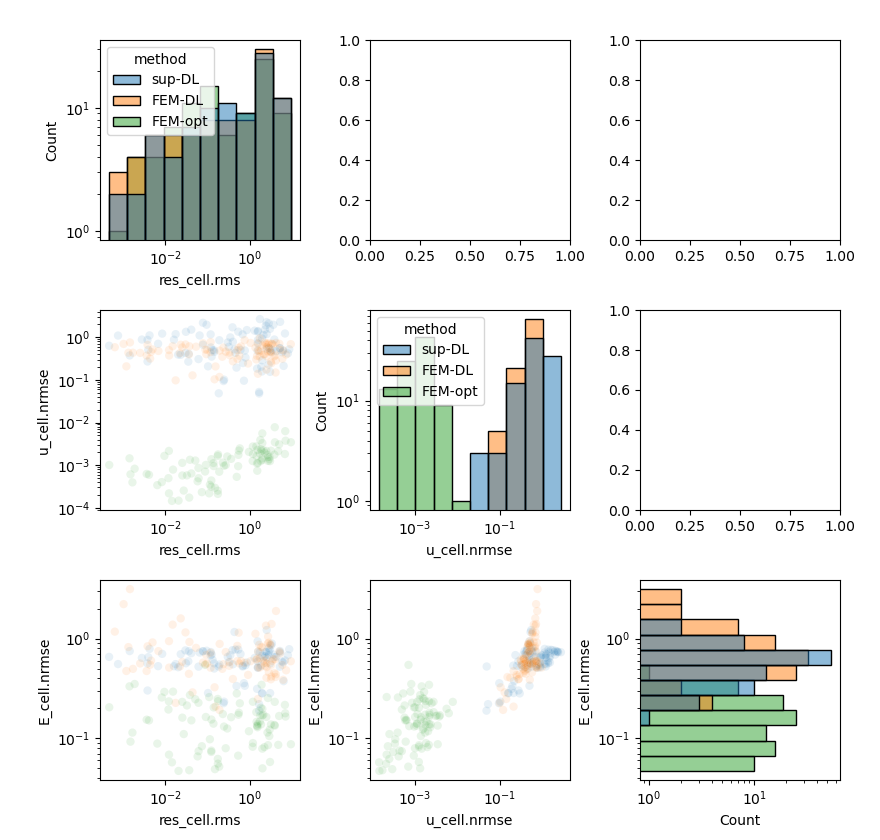

In [37]:
fig, axes = mpl_viz.subplot_grid(3, 3, ax_height=2, ax_width=2, padding=(1.0, 0.4, 0.6, 0.4), spacing=0.7) # lrbt

df = ex_df[ex_df['params.rho_known']]
hue = 'method'

ax = axes[0,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='res_cell.rms', hue=hue, legend=True, ax=ax)

ax = axes[1,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='u_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[1,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='u_cell.nrmse', hue=hue, legend=True, ax=ax)

ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='u_cell.nrmse', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,2]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, y='E_cell.nrmse', hue=hue, legend=False, ax=ax)


/var/tmp/ipykernel_58622/2922510934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_58622/2922510934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)


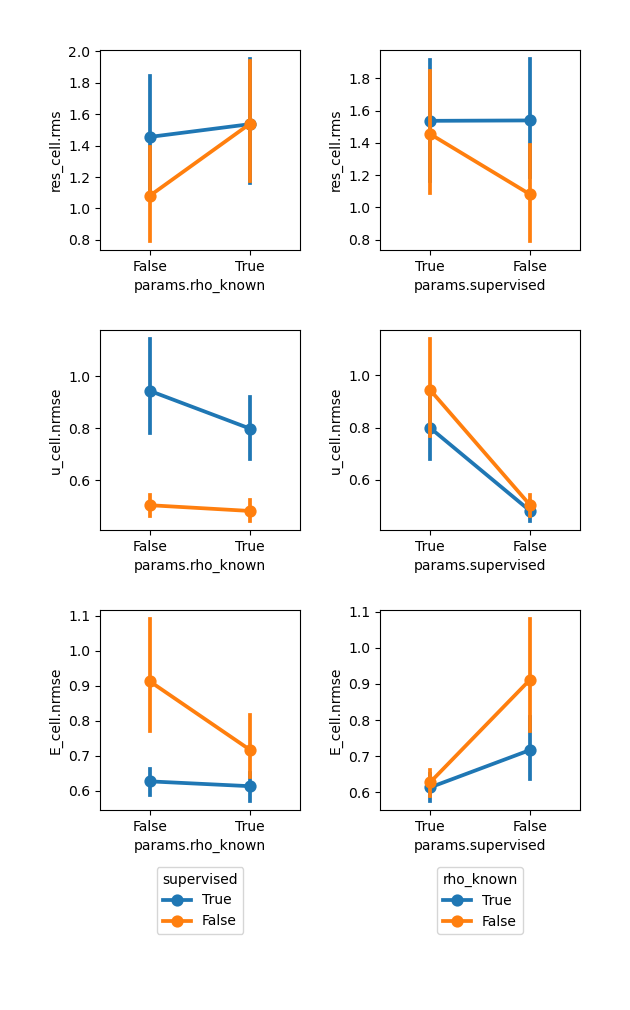

In [38]:
def add_group_column(df, cols, sep=' '):
    new_col = sep.join(cols)
    df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
    return new_col

def plot(df, x, y):
    xs = x if isinstance(x, list) else [x]
    ys = y if isinstance(y, list) else [y]
    n_cols = len(xs)
    n_rows = len(ys)
    fig, axes = mpl_viz.subplot_grid(
        n_rows, n_cols,
        ax_height=2,
        ax_width=2,
        padding=[1.0, 0.5, 2.0, 0.5], 
        spacing=[0.8, 0.8]
    )
    for i, x in enumerate(xs):
        hue = add_group_column(df, [c for c in xs if c != x])
        for j, y in enumerate(ys):
            ax = axes[j,i]
            sns.pointplot(df, x=x, y=y, hue=hue, ax=ax, legend=True)
            ax.get_legend().remove()
            if j + 1 == n_rows:
                handles, labels = ax.get_legend_handles_labels()
                title = hue.replace('params.', '')
                ax.legend(handles, labels, loc='upper center', bbox_to_anchor=[0.5, -0.25], title=title)

plot(
    ex_df[ex_df.method != 'FEM-opt'],
    x=['params.rho_known', 'params.supervised'],
    y=['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']
)

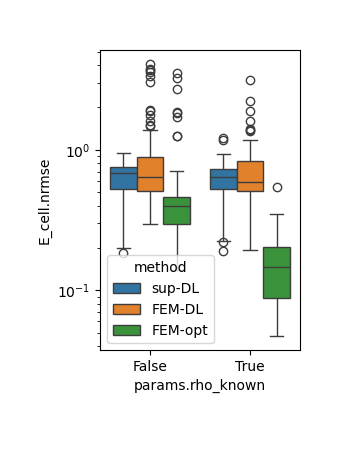

In [105]:
y_cols = ['E_cell.nrmse'] #['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=2,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        ex_df[
            (ex_df['params.bounds_mode'].fillna('none') == 'none')
        ],
        hue='method',
        x='params.rho_known',
        y=y_col,
        ax=axes[0,i]
    )

for ax in axes.flatten():
    ax.set_yscale('log')
    #ax.set_ylim(0.01, 10.0)
    #ax.legend(loc='upper left', title='params.supervised')

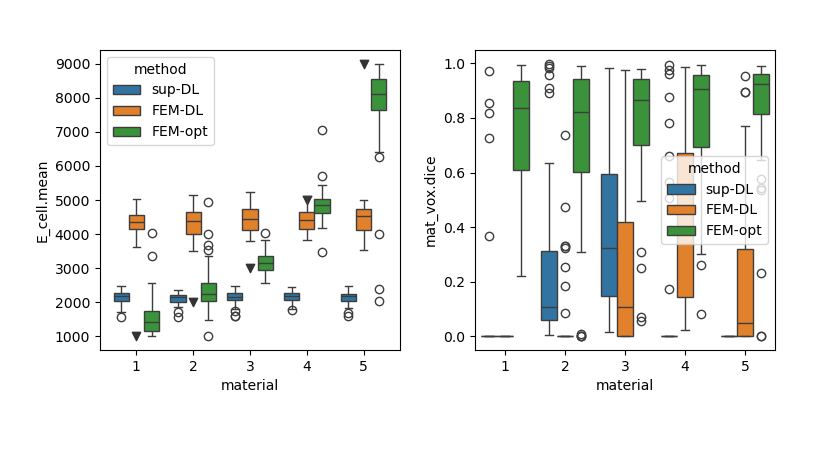

In [106]:
y_cols = ['E_cell.mean', 'mat_vox.dice'] #, 'E_cell.nrmse', 'mat_vox.dice']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=3,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        mat_df[mat_df['params.rho_known']],
        hue='method',
        x='material',
        y=y_col,
        ax=axes[0,i]
    )
    if y_col == 'E_cell.mean':
        axes[0,i].scatter(range(5), [1e3, 2e3, 3e3, 5e3, 9e3], marker='v', c='0.2')


In [89]:
from IPython.display import Image

In [98]:
job = jobs_t[
    jobs_t['params.rho_known'] &
    jobs_t['params.supervised'] &
    (jobs_t['params.bounds_mode'] == 'none')
].iloc[0]
job

job_name                                               099f680c4b90ae80
job_state                                                       RUNNING
n_submits                                                             1
job_id                                                         37172077
node_id                                                            v002
runtime                                                         8:54:17
stdout                Loading /ocean/projects/asc170022p/mtragoza/lu...
stderr                  self.fig.tight_layout()\n/ocean/projects/asc...
base_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir               /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path           /ocean/projects/asc170022p/mtragoza/lung-p

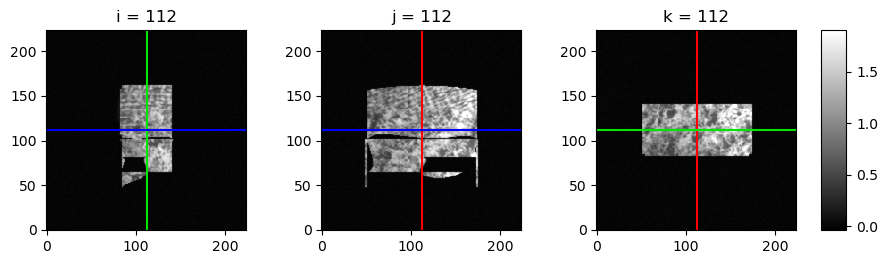

In [99]:
Image(filename=f'{job.work_dir}/outputs/image_viewer.png')

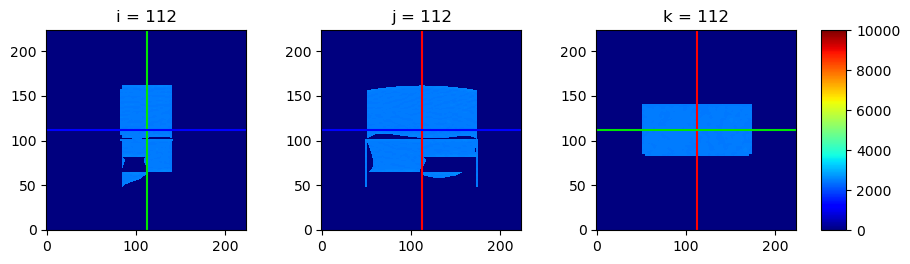

In [100]:
Image(filename=f'{job.work_dir}/outputs/E_pred_viewer.png')

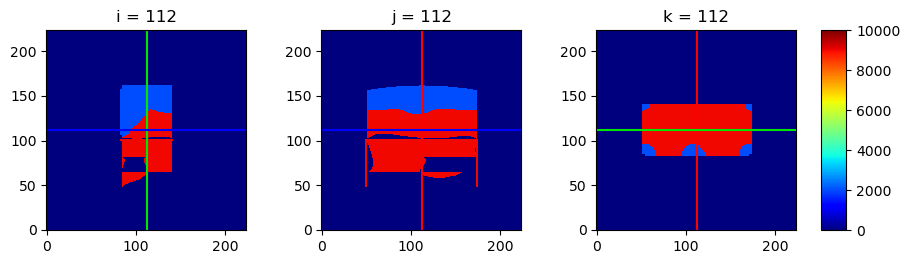

In [101]:
Image(filename=f'{job.work_dir}/outputs/E_true_viewer.png')

/var/tmp/ipykernel_82813/916136722.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]


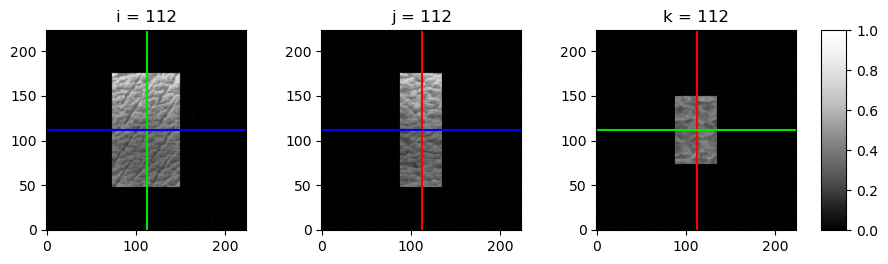

In [53]:
job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]
Image(filename=f'{base_dir}/{job_name}/outputs/image_viewer.png')

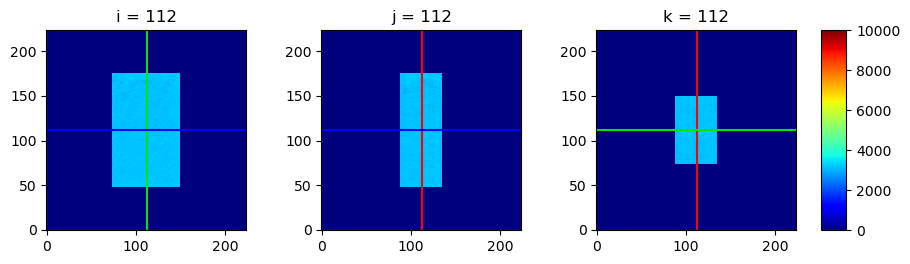

In [54]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_pred_viewer.png')

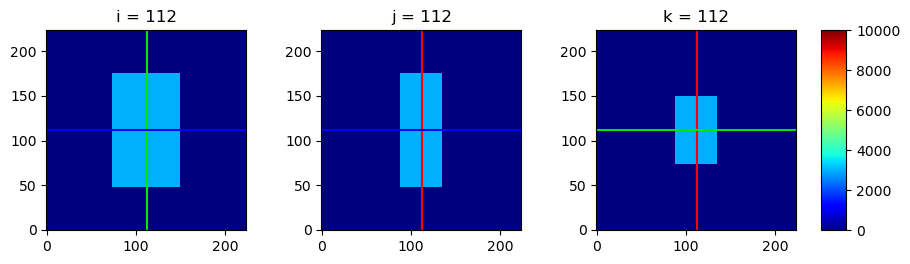

In [55]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_true_viewer.png')